### Solving Poisson Equation on S^2: $\Delta u = f$


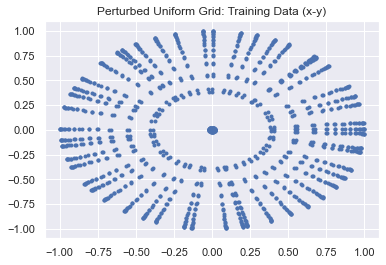

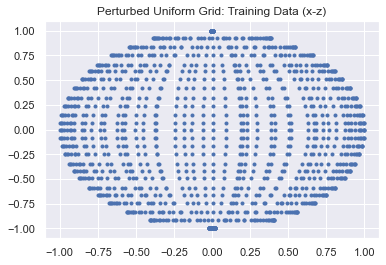

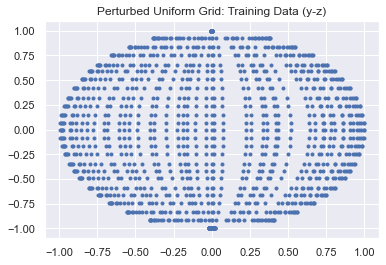

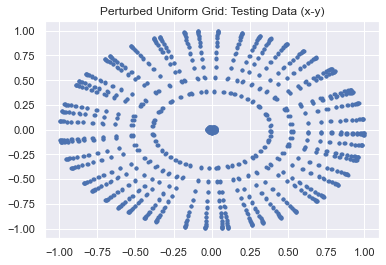

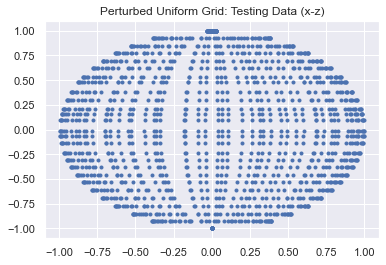

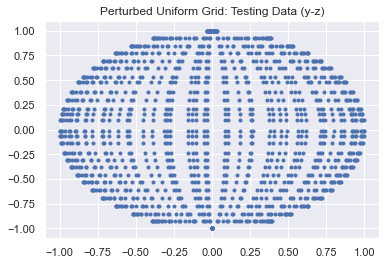

iteration 0: loss = 50.34053421020508


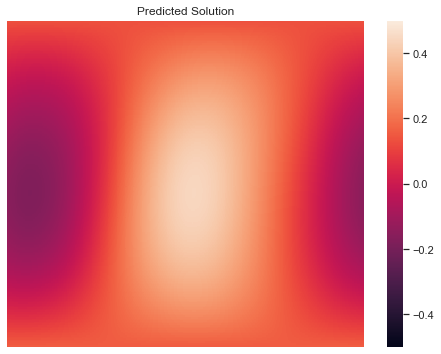

iteration 100: loss = 48.528839111328125
iteration 200: loss = 54.657894134521484
iteration 300: loss = 48.54050827026367
iteration 400: loss = 50.744468688964844
iteration 500: loss = 46.44508743286133
iteration 600: loss = 50.02090835571289
iteration 700: loss = 50.0457763671875
iteration 800: loss = 48.69688415527344
iteration 900: loss = 48.32421112060547
iteration 1000: loss = 46.76362609863281
iteration 1100: loss = 50.27644348144531
iteration 1200: loss = 45.21574783325195
iteration 1300: loss = 40.77134704589844
iteration 1400: loss = 44.04656982421875
iteration 1500: loss = 41.796817779541016
iteration 1600: loss = 40.49311447143555
iteration 1700: loss = 33.396728515625
iteration 1800: loss = 34.13258743286133
iteration 1900: loss = 33.37945556640625
iteration 2000: loss = 28.562763214111328


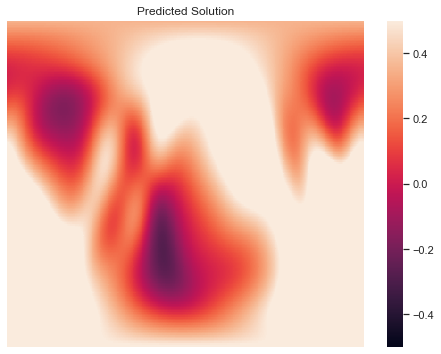

iteration 2100: loss = 26.80851936340332
iteration 2200: loss = 21.96526336669922
iteration 2300: loss = 17.75010871887207
iteration 2400: loss = 17.73763084411621
iteration 2500: loss = 17.364883422851562
iteration 2600: loss = 14.828987121582031
iteration 2700: loss = 12.232181549072266
iteration 2800: loss = 9.613158226013184
iteration 2900: loss = 8.481769561767578
iteration 3000: loss = 7.433363914489746
iteration 3100: loss = 6.418006896972656
iteration 3200: loss = 5.712331771850586
iteration 3300: loss = 5.258580684661865
iteration 3400: loss = 5.456943988800049
iteration 3500: loss = 5.0104780197143555
iteration 3600: loss = 5.165225505828857
iteration 3700: loss = 5.001900672912598
iteration 3800: loss = 5.042824745178223
iteration 3900: loss = 5.062586307525635
iteration 4000: loss = 4.714485168457031


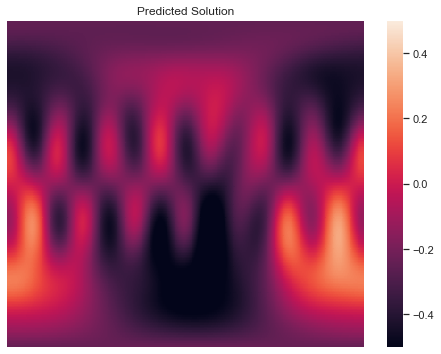

iteration 4100: loss = 4.844448089599609
iteration 4200: loss = 4.98496150970459
iteration 4300: loss = 4.626528263092041
iteration 4400: loss = 4.5451579093933105
iteration 4500: loss = 4.522191047668457
iteration 4600: loss = 4.610695838928223
iteration 4700: loss = 4.938211441040039
iteration 4800: loss = 4.391726493835449
iteration 4900: loss = 4.7313008308410645
iteration 5000: loss = 4.505492210388184
iteration 5100: loss = 4.516697883605957
iteration 5200: loss = 4.858700752258301
iteration 5300: loss = 4.412470817565918
iteration 5400: loss = 4.509983539581299
iteration 5500: loss = 4.533470153808594
iteration 5600: loss = 4.488471984863281
iteration 5700: loss = 4.300476551055908
iteration 5800: loss = 4.368874549865723
iteration 5900: loss = 4.495684623718262
iteration 6000: loss = 3.9814541339874268


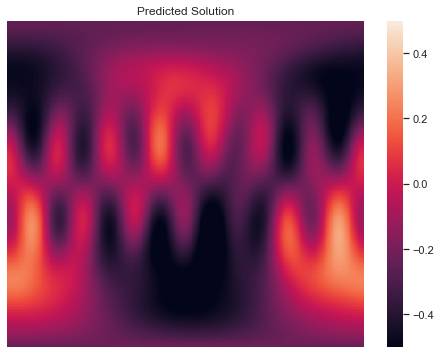

iteration 6100: loss = 4.305233001708984
iteration 6200: loss = 4.248811721801758
iteration 6300: loss = 4.3073296546936035
iteration 6400: loss = 4.218883037567139
iteration 6500: loss = 4.142891883850098
iteration 6600: loss = 3.988600492477417
iteration 6700: loss = 4.104742527008057
iteration 6800: loss = 4.075229644775391
iteration 6900: loss = 4.190593242645264
iteration 7000: loss = 4.104572296142578
iteration 7100: loss = 4.199697494506836
iteration 7200: loss = 4.156550407409668
iteration 7300: loss = 4.155492782592773
iteration 7400: loss = 3.9715168476104736
iteration 7500: loss = 3.7673287391662598
iteration 7600: loss = 4.032848358154297
iteration 7700: loss = 4.127425670623779
iteration 7800: loss = 3.8346922397613525
iteration 7900: loss = 4.105966091156006
iteration 8000: loss = 3.8893775939941406


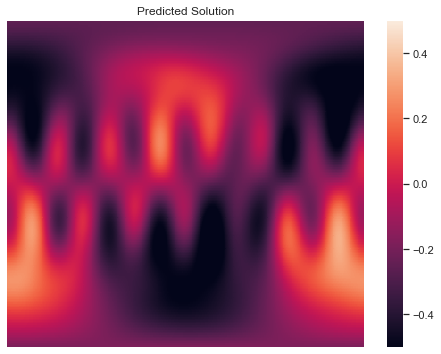

iteration 8100: loss = 3.9344358444213867
iteration 8200: loss = 3.669748067855835
iteration 8300: loss = 3.698428153991699
iteration 8400: loss = 4.0300116539001465
iteration 8500: loss = 3.987654447555542
iteration 8600: loss = 4.052107334136963
iteration 8700: loss = 3.9662370681762695
iteration 8800: loss = 3.889059066772461
iteration 8900: loss = 3.816925525665283
iteration 9000: loss = 3.705320358276367
iteration 9100: loss = 3.847371816635132
iteration 9200: loss = 3.9457333087921143
iteration 9300: loss = 4.152689456939697
iteration 9400: loss = 4.001206398010254
iteration 9500: loss = 3.6129117012023926
iteration 9600: loss = 3.877943992614746
iteration 9700: loss = 3.7558584213256836
iteration 9800: loss = 3.8859992027282715
iteration 9900: loss = 3.789036512374878
iteration 10000: loss = 3.909381628036499


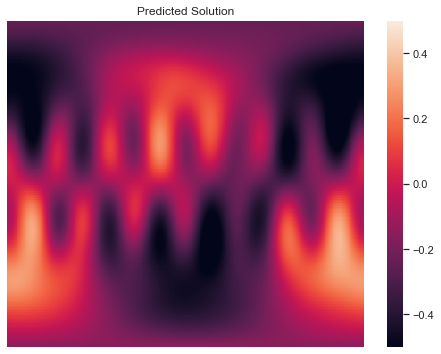

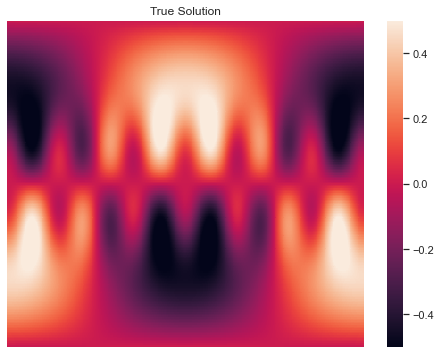

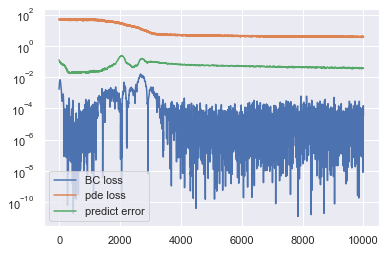

In [6]:
import torch

from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np
import pyshtools as pysh

torch.manual_seed(0)
maxiter = 10001
problem = Problem_Sphere_Poisson()


def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)
            
        def inner_sample(self, sampling_method = 'kadec', N = 25, cos_azimuth_start = -0.9999, cos_azimuth_end = 0.9999):
            if (sampling_method == 'kadec'):
                
                cos_azimuth = torch.linspace(cos_azimuth_start, cos_azimuth_end, N, requires_grad=False)
                azimuth = torch.arccos(cos_azimuth)
                polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)

                ## noise
                dpolar = 2*pi/(2*N-1)
                dazimuth = 1.0/(N-1)
                polar_noise = torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
                azimuth_noise = torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(azimuth.shape))            

                azimuth, polar = azimuth + azimuth_noise, polar + polar_noise
                azimuth, polar = torch.meshgrid(azimuth, polar)

                location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
                return location
            
            if (sampling_method == 'uniform_hemisphere'):
                
                cos_azimuth = torch.linspace(cos_azimuth_start, cos_azimuth_end, N, requires_grad=False)
                azimuth = torch.arccos(cos_azimuth)
                polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
                azimuth, polar = torch.meshgrid(azimuth, polar)
                location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
                return location
            
#             if (sampling_method == 'kadec_hemisphere'):
#             if (sampling_method == 'Gaussian'):
            
            
        
        def plot_distribution(self, coor_inner, title):
            
            coor_inner = coor_inner.detach().numpy()
            azimuth, polar = coor_inner[:,0], coor_inner[:,1]
            # Cartesian coordinates: x, y, z
            x, y, z = np.sin(azimuth) * np.cos(polar), np.sin(azimuth) * np.sin(polar),  np.cos(azimuth)
            x = x.reshape([-1,1])
            y = y.reshape([-1,1])
            z = z.reshape([-1,1])
            
            ## plotting to ensure data is uniform on sphere
            plt.plot(x,y,'.')
            plt.title(title + " (x-y)")
            plt.show()
            plt.plot(x,z,'.')
            plt.title(title + " (x-z)")
            plt.show()
            plt.plot(y,z,'.')
            plt.title(title + " (y-z)")
            plt.show()
            
            
        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self, plot = False):
            # kadec perturbed:
            coor = self.inner_sample('kadec', N=27)
            if(plot):
                self.plot_distribution(coor, title = "Perturbed Uniform Grid: Testing Data")
            
            # uniform hemisphere (test the lower hemisphere):
#           coor_inner = self.inner_sample('uniform_hemisphere', N=27, cos_azimuth_start=-0.9999, cos_azimuth_end=0.0).detach().requires_grad_(True)

            # kadec perturbed hemisphere (test the lower hemisphere):
#           coor_inner = self.inner_sample('kadec_hemisphere',  N=27, cos_azimuth_start=-0.9999, cos_azimuth_end=0.0).detach().requires_grad_(True)

            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter
            
            for iter in range(maxiter):
                net.zero_grad()
                
                # kadec perturbed:
                coor_inner = self.inner_sample('kadec').detach().requires_grad_(True)
                if(iter == 0):
                    self.plot_distribution(coor_inner, title = "Perturbed Uniform Grid: Training Data")
                    
                # uniform hemisphere (train the upper hemisphere):
#               coor_inner = self.inner_sample('uniform_hemisphere', N=25, cos_azimuth_start=0.0, cos_azimuth_end=0.9999).detach().requires_grad_(True)

                # kadec perturbed hemisphere (train the upper hemisphere):
#               coor_inner = self.inner_sample('kadec_hemisphere',  N=25, cos_azimuth_start=0.0, cos_azimuth_end=0.9999).detach().requires_grad_(True)

                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)
                
                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                if iter == 0:
                    self.predict_error_value = self.predict_error(plot = True)
                else:
                    self.predict_error_value = self.predict_error(plot = False)
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                for i in range(len(self.loss_history)):
                    for j in range(3):
                        self.loss_history[i][j] = self.loss_history[i][j].detach().requires_grad_(False)
                        
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}".format(iter, self.total_loss))
                        
                if iter % int(maxiter / 5) == 0:
                    self.plot(net)
 
            self.plot_true()
            self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 15, 1]))
model.train()


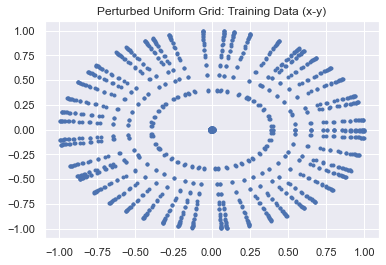

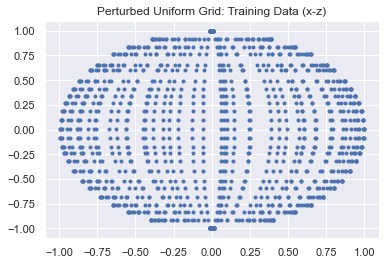

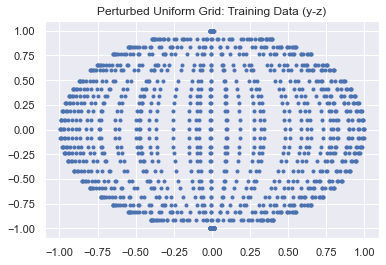

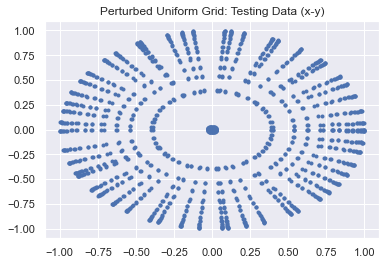

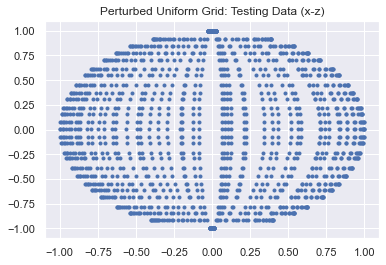

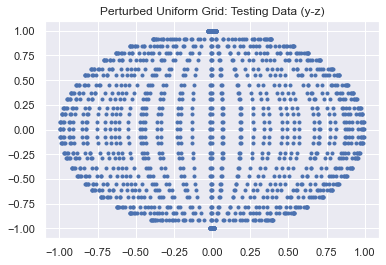

iteration 0: loss = 51.718292236328125


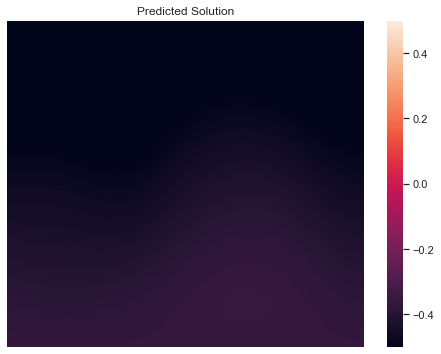

iteration 100: loss = 45.8284797668457
iteration 200: loss = 50.584999084472656
iteration 300: loss = 52.70476531982422
iteration 400: loss = 51.15412139892578
iteration 500: loss = 45.29891586303711
iteration 600: loss = 41.64646530151367
iteration 700: loss = 39.275489807128906
iteration 800: loss = 40.732852935791016
iteration 900: loss = 37.44861602783203
iteration 1000: loss = 35.1982421875
iteration 1100: loss = 39.72426223754883
iteration 1200: loss = 34.33708190917969
iteration 1300: loss = 30.87789535522461
iteration 1400: loss = 34.66439437866211
iteration 1500: loss = 31.490163803100586
iteration 1600: loss = 35.70935821533203
iteration 1700: loss = 32.089969635009766
iteration 1800: loss = 28.529748916625977
iteration 1900: loss = 31.653968811035156
iteration 2000: loss = 33.33990478515625


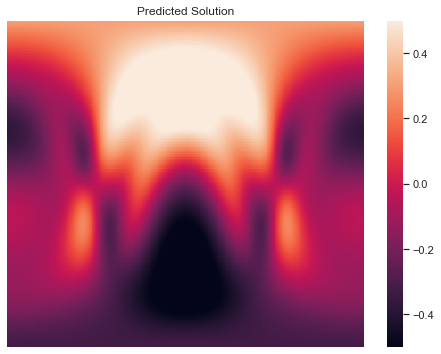

iteration 2100: loss = 29.300735473632812
iteration 2200: loss = 26.591815948486328
iteration 2300: loss = 24.909982681274414
iteration 2400: loss = 27.39606475830078
iteration 2500: loss = 28.62137222290039
iteration 2600: loss = 27.2484073638916
iteration 2700: loss = 28.61920738220215
iteration 2800: loss = 27.840755462646484
iteration 2900: loss = 27.168842315673828
iteration 3000: loss = 24.361316680908203
iteration 3100: loss = 26.40376091003418
iteration 3200: loss = 26.76376724243164
iteration 3300: loss = 23.567886352539062
iteration 3400: loss = 23.66498565673828
iteration 3500: loss = 22.94230079650879
iteration 3600: loss = 22.186532974243164
iteration 3700: loss = 22.98036003112793
iteration 3800: loss = 21.65601921081543
iteration 3900: loss = 22.057186126708984
iteration 4000: loss = 20.7565975189209


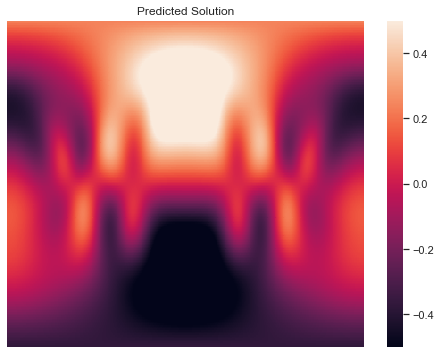

iteration 4100: loss = 19.57046127319336
iteration 4200: loss = 20.17609977722168
iteration 4300: loss = 21.229244232177734
iteration 4400: loss = 21.180776596069336
iteration 4500: loss = 19.73485565185547
iteration 4600: loss = 20.497785568237305
iteration 4700: loss = 19.27589225769043
iteration 4800: loss = 19.881349563598633
iteration 4900: loss = 18.957477569580078
iteration 5000: loss = 20.337553024291992
iteration 5100: loss = 18.25225257873535
iteration 5200: loss = 20.64309310913086
iteration 5300: loss = 16.85059356689453
iteration 5400: loss = 18.33632469177246
iteration 5500: loss = 17.689594268798828
iteration 5600: loss = 17.576608657836914
iteration 5700: loss = 17.762720108032227
iteration 5800: loss = 18.059152603149414
iteration 5900: loss = 19.243635177612305
iteration 6000: loss = 18.123342514038086


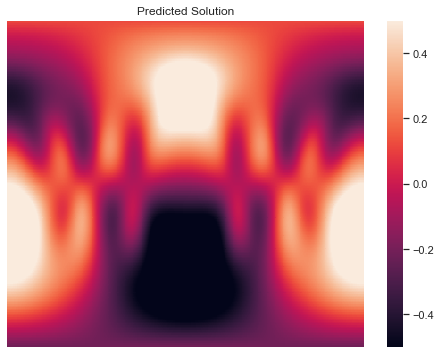

iteration 6100: loss = 18.17304229736328
iteration 6200: loss = 17.271108627319336
iteration 6300: loss = 15.843941688537598
iteration 6400: loss = 14.34823226928711
iteration 6500: loss = 13.624687194824219
iteration 6600: loss = 13.81143856048584
iteration 6700: loss = 13.293789863586426
iteration 6800: loss = 14.285840034484863
iteration 6900: loss = 13.748957633972168
iteration 7000: loss = 12.482828140258789
iteration 7100: loss = 13.157175064086914
iteration 7200: loss = 13.071527481079102
iteration 7300: loss = 12.055425643920898
iteration 7400: loss = 11.030264854431152
iteration 7500: loss = 11.602619171142578
iteration 7600: loss = 12.176006317138672
iteration 7700: loss = 12.009878158569336
iteration 7800: loss = 12.354279518127441
iteration 7900: loss = 10.684181213378906
iteration 8000: loss = 10.382410049438477


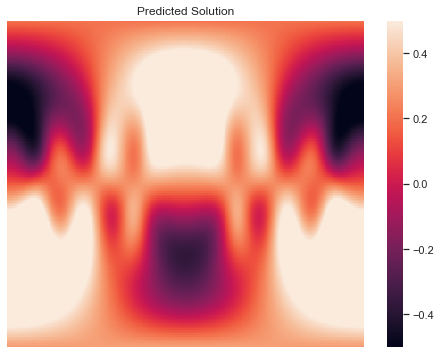

iteration 8100: loss = 11.359654426574707
iteration 8200: loss = 11.651692390441895
iteration 8300: loss = 11.169634819030762
iteration 8400: loss = 11.87091064453125
iteration 8500: loss = 10.956530570983887
iteration 8600: loss = 10.058631896972656
iteration 8700: loss = 11.031725883483887
iteration 8800: loss = 10.63559627532959
iteration 8900: loss = 10.165578842163086
iteration 9000: loss = 11.448338508605957
iteration 9100: loss = 12.0833158493042
iteration 9200: loss = 10.638511657714844
iteration 9300: loss = 10.554183959960938
iteration 9400: loss = 10.142751693725586
iteration 9500: loss = 10.08586597442627
iteration 9600: loss = 10.01900577545166
iteration 9700: loss = 9.850976943969727
iteration 9800: loss = 9.938620567321777
iteration 9900: loss = 10.841161727905273
iteration 10000: loss = 9.810077667236328


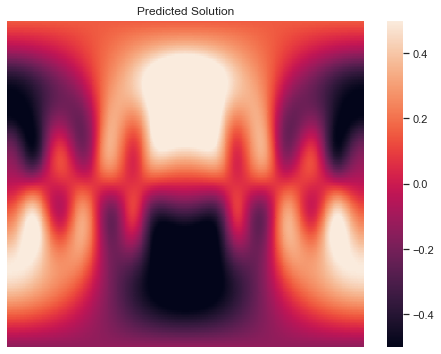

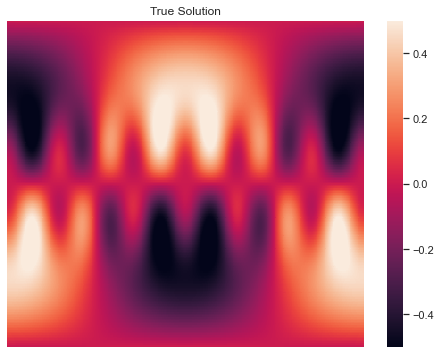

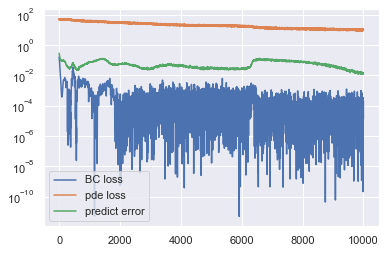

In [7]:
import torch

from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np
import pyshtools as pysh

torch.manual_seed(0)
maxiter = 10001
problem = Problem_Sphere_Poisson()


def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)
            
        def inner_sample(self, sampling_method = 'kadec', N = 25, cos_azimuth_start = -0.9999, cos_azimuth_end = 0.9999):
            if (sampling_method == 'kadec'):
                
                cos_azimuth = torch.linspace(cos_azimuth_start, cos_azimuth_end, N, requires_grad=False)
                azimuth = torch.arccos(cos_azimuth)
                polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)

                ## noise
                dpolar = 2*pi/(2*N-1)
                dazimuth = 1.0/(N-1)
                polar_noise = torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
                azimuth_noise = torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(azimuth.shape))            

                azimuth, polar = azimuth + azimuth_noise, polar + polar_noise
                azimuth, polar = torch.meshgrid(azimuth, polar)

                location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
                return location
            
            if (sampling_method == 'uniform_hemisphere'):
                
                cos_azimuth = torch.linspace(cos_azimuth_start, cos_azimuth_end, N, requires_grad=False)
                azimuth = torch.arccos(cos_azimuth)
                polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
                azimuth, polar = torch.meshgrid(azimuth, polar)
                location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
                return location
            
#             if (sampling_method == 'kadec_hemisphere'):
#             if (sampling_method == 'Gaussian'):
            
            
        
        def plot_distribution(self, coor_inner, title):
            
            coor_inner = coor_inner.detach().numpy()
            azimuth, polar = coor_inner[:,0], coor_inner[:,1]
            # Cartesian coordinates: x, y, z
            x, y, z = np.sin(azimuth) * np.cos(polar), np.sin(azimuth) * np.sin(polar),  np.cos(azimuth)
            x = x.reshape([-1,1])
            y = y.reshape([-1,1])
            z = z.reshape([-1,1])
            
            ## plotting to ensure data is uniform on sphere
            plt.plot(x,y,'.')
            plt.title(title + " (x-y)")
            plt.show()
            plt.plot(x,z,'.')
            plt.title(title + " (x-z)")
            plt.show()
            plt.plot(y,z,'.')
            plt.title(title + " (y-z)")
            plt.show()
            
            
        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self, plot = False):
            # kadec perturbed:
            coor = self.inner_sample('kadec', N=27)
            if(plot):
                self.plot_distribution(coor, title = "Perturbed Uniform Grid: Testing Data")
            
            # uniform hemisphere (test the lower hemisphere):
#           coor_inner = self.inner_sample('uniform_hemisphere', N=27, cos_azimuth_start=-0.9999, cos_azimuth_end=0.0).detach().requires_grad_(True)

            # kadec perturbed hemisphere (test the lower hemisphere):
#           coor_inner = self.inner_sample('kadec_hemisphere',  N=27, cos_azimuth_start=-0.9999, cos_azimuth_end=0.0).detach().requires_grad_(True)

            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter
            
            for iter in range(maxiter):
                net.zero_grad()
                
                # kadec perturbed:
                coor_inner = self.inner_sample('kadec').detach().requires_grad_(True)
                if(iter == 0):
                    self.plot_distribution(coor_inner, title = "Perturbed Uniform Grid: Training Data")
                    
                # uniform hemisphere (train the upper hemisphere):
#               coor_inner = self.inner_sample('uniform_hemisphere', N=25, cos_azimuth_start=0.0, cos_azimuth_end=0.9999).detach().requires_grad_(True)

                # kadec perturbed hemisphere (train the upper hemisphere):
#               coor_inner = self.inner_sample('kadec_hemisphere',  N=25, cos_azimuth_start=0.0, cos_azimuth_end=0.9999).detach().requires_grad_(True)

                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)
                
                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                if iter == 0:
                    self.predict_error_value = self.predict_error(plot = True)
                else:
                    self.predict_error_value = self.predict_error(plot = False)
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                for i in range(len(self.loss_history)):
                    for j in range(3):
                        self.loss_history[i][j] = self.loss_history[i][j].detach().requires_grad_(False)
                        
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}".format(iter, self.total_loss))
                        
                if iter % int(maxiter / 5) == 0:
                    self.plot(net)
 
            self.plot_true()
            self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 5, 5, 5, 1]))
model.train()
